<a href="https://colab.research.google.com/github/feliperromao/datascience-na-pratica/blob/main/pandas_tratamento_dados_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd

## Carregando os dados

In [188]:
df = pd.read_csv("https://raw.githubusercontent.com/feliperromao/datascience-na-pratica/main/Churn.csv", sep=";")
df.shape

(999, 12)

## Analise exploratória e preparação dos dados
Ao visualizar os dados pela primeira vez percebemos que as colunas não estão com os nomes adequados

Vamos renomear as colunas

In [189]:
df.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Renomeando as colunas e visualizando os dados

In [190]:
df.columns = ["id", "score", "estado", "genero", "idade", "patrimonio", "saldo", "produtos", "cartao-credito", "ativo", "salario", "saiu"]
df.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Verificando dados nulos

In [191]:
df.isnull().sum()

id                0
score             0
estado            0
genero            8
idade             0
patrimonio        0
saldo             0
produtos          0
cartao-credito    0
ativo             0
salario           7
saiu              0
dtype: int64

### Preenchendo dados nulos de `salario` com a média 

In [192]:
## Visualizando detalhes de salario
df.salario.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salario, dtype: float64

In [193]:
salario_median = df.salario.median()
df.salario.fillna(salario_median, inplace=True)
df.salario.isnull().sum()

0

### Preenchendo os dados nulos de `genero` com a moda
Ao analisar os dados de genero percebemos que as categorias não estão padronizadas, possuindo mais de um valor para cada genero

Vamos normalizar os dados dessa coluna substituindo pelos valores corretos sendo `Masculino` e `Feminino`

Vamos também preencher os valores nulos com `Masculino` pois é o valor com maior ocorrência dentro do dataset

In [194]:
df.genero.value_counts()

Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: genero, dtype: int64

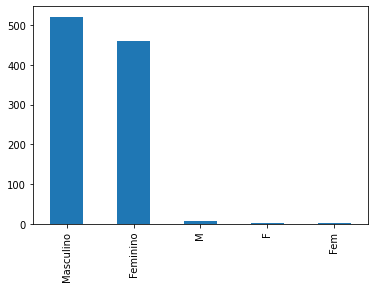

In [195]:
df.genero.value_counts().plot(kind="bar");

In [196]:
df.genero.fillna("Masculino", inplace=True)
df.genero.isnull().sum()

0

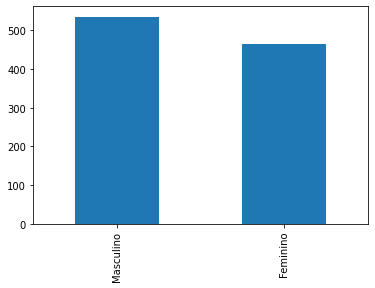

In [197]:
## Ajustando valores fora do padrão
df.loc[df.genero == "M", "genero"] = "Masculino"
df.loc[df.genero.isin(["F", "Fem"]), "genero"] = "Feminino"

df.genero.value_counts().plot(kind="bar");

### Convertendo valores booleanos

Ao analisar os dados vemos que as colunas `saiu`, `cartao-credito` e `ativo` são dados com valores boleanos que estão representados por `1` e `0`. Vamos converter para `True` e `False` pois dessa forma o pandas irá processar essas informações de forma correta

In [198]:
df.loc[df["saiu"] == 1, "saiu"] = True
df.loc[df["saiu"] == 0, "saiu"] = False

df.loc[df["cartao-credito"] == 1, "cartao-credito"] = True
df.loc[df["cartao-credito"] == 0, "cartao-credito"] = False

df.loc[df["ativo"] == 1, "ativo"] = True
df.loc[df["ativo"] == 0, "ativo"] = False

In [199]:
df.head()

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu
0,1,619,RS,Feminino,42,2,0,1,True,True,10134888.0,True
1,2,608,SC,Feminino,41,1,8380786,1,False,True,11254258.0,False
2,3,502,RS,Feminino,42,8,1596608,3,True,False,11393157.0,True
3,4,699,RS,Feminino,39,1,0,2,False,False,9382663.0,False
4,5,850,SC,Feminino,43,2,12551082,1,True,True,790841.0,False


In [200]:
df.describe()

,id,score,idade,patrimonio,saldo,produtos,salario
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,9.990000e+02
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,3.510134e+07
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,5.287206e+08
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,9.677000e+03
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,3.078473e+06
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,8.703250e+06
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.402954e+07
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.193469e+10


### Analisando coluna `estado`

Nessa coluna podemos ver que existe dois valores que não correspondem a nenhum estado: `TD` e `RP`

Podemos observar tbm que temos o estado de `SP` cujo não faz parte da região que a empresa atende

De acordo com essa análise devemos substituir os valores de `TD`, `RP` e `SP` pelo valor da moda, que é `RS`

In [201]:
df.estado.value_counts()

RS    478
SC    258
PR    257
SP      4
TD      1
RP      1
Name: estado, dtype: int64

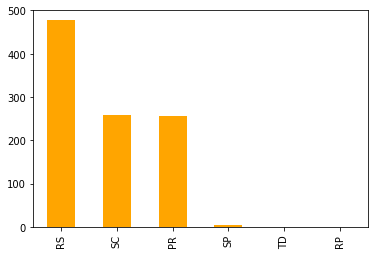

In [202]:
df.estado.value_counts().plot.bar(color="orange");

In [203]:
df.loc[df.estado.isin(["TD", "RP", "SP"]), "estado"] = "RS"

In [204]:
df.estado.value_counts()

RS    484
SC    258
PR    257
Name: estado, dtype: int64

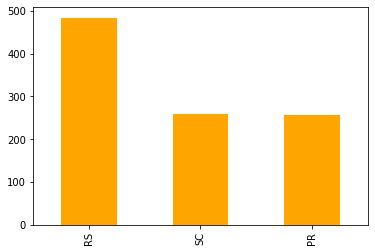

In [205]:
df.estado.value_counts().plot.bar(color="orange");

### Analisando coluna `idade`

Ao analisar as idades percebemos que existem valores que vão de-20 até 140, esses valores estão totalmente inconsistentes e precisam ser substituidos. Vamos substituir esses valores pela mediana

In [206]:
df.idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

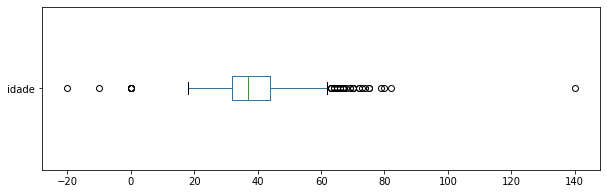

In [207]:
df.idade.plot.box(vert=False, figsize=(10,3));

In [208]:
## Visualizando os registros que estão fora do padrão
df.loc[(df.idade < 0) | (df.idade > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu
867,869,636,RS,Feminino,-10,1,17083346,1,True,False,11051028.0,True
984,986,773,RS,Masculino,-20,1,12453278,2,False,True,1172357.0,False
990,992,655,RS,Masculino,140,5,93147,2,True,False,6621413.0,False


In [209]:
idade_median = df.idade.median()
idade_median

37.0

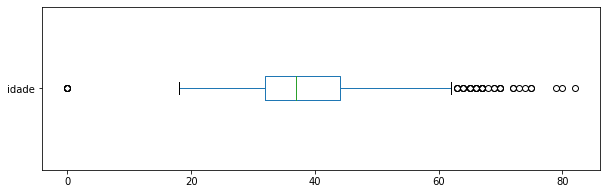

In [210]:
df.loc[(df.idade < 0) | (df.idade > 120), "idade"] = idade_median

df.idade.plot.box(vert=False, figsize=(10,3));

In [211]:
df.loc[(df.idade < 0) | (df.idade > 120)]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu


In [212]:
df.loc[867]

id                       869
score                    636
estado                    RS
genero              Feminino
idade                     37
patrimonio                 1
saldo               17083346
produtos                   1
cartao-credito          True
ativo                  False
salario           1.1051e+07
saiu                    True
Name: 867, dtype: object

### Tratando dados duplicados

In [213]:
df[ df.duplicated(["id"], keep=False) ]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu
80,81,665,RS,Feminino,34,1,9664554,2,False,False,17141366.0,False
81,81,665,RS,Feminino,34,1,9664554,2,False,False,17141366.0,False


In [214]:
df.drop_duplicates(subset="id", keep="first", inplace=True)
df[ df.duplicated(["id"], keep=False) ]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu


### Analisando desvio padrão na coluna `salario`

In [215]:
salario_std = df.salario.std()
salario_std

528985400.6350281

In [216]:
## Verificando se existe salario 2 vezes maior que o desvio padrão

df.loc[df.salario >= salario_std * 2]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu
7,8,376,PR,Feminino,29,4,11504674,4,True,False,1.193469e+10,True
116,118,668,PR,Feminino,37,6,1678644,1,True,False,1.156383e+10,False
170,172,484,RS,Feminino,29,4,13011439,1,True,False,1.640179e+09,False
230,232,673,RS,Masculino,72,1,0,2,False,True,1.119812e+09,False


In [218]:
## Substituindo os valres de outliers pelo valor da mediana

salario_median = df.salario.median()
df.loc[df.salario >= salario_std * 2, "salario"] = salario_median

In [219]:
df.loc[df.salario >= salario_std * 2]

,id,score,estado,genero,idade,patrimonio,saldo,produtos,cartao-credito,ativo,salario,saiu
